**Task 1: Exploratory Data Analysis (EDA)**

In [ ]:
#Load the dataset
import pandas as pd
df=pd.read_csv('/content/wine.csv')

In [ ]:
#Basic data exploration
print("Dataset Shape:" ,df.shape)

print("\nData Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

print("\nFirst 5 Rows:")
print(df.head())

Dataset Shape: (178, 14)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None

Statistical Summary:
             Type     Alcohol       Malic  

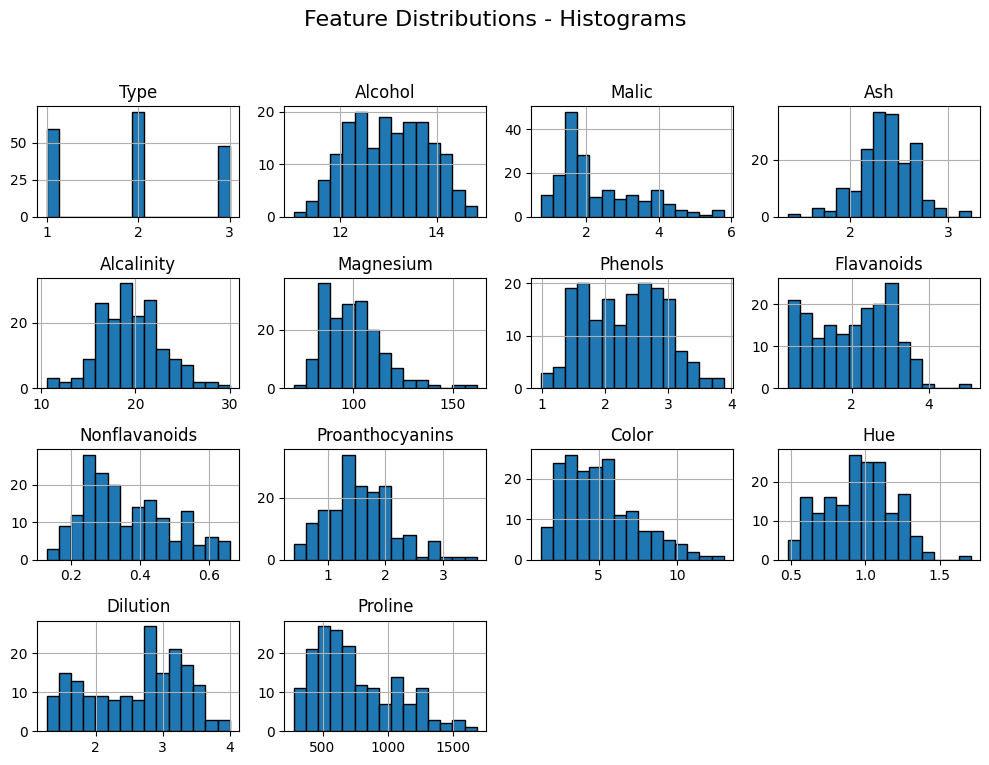

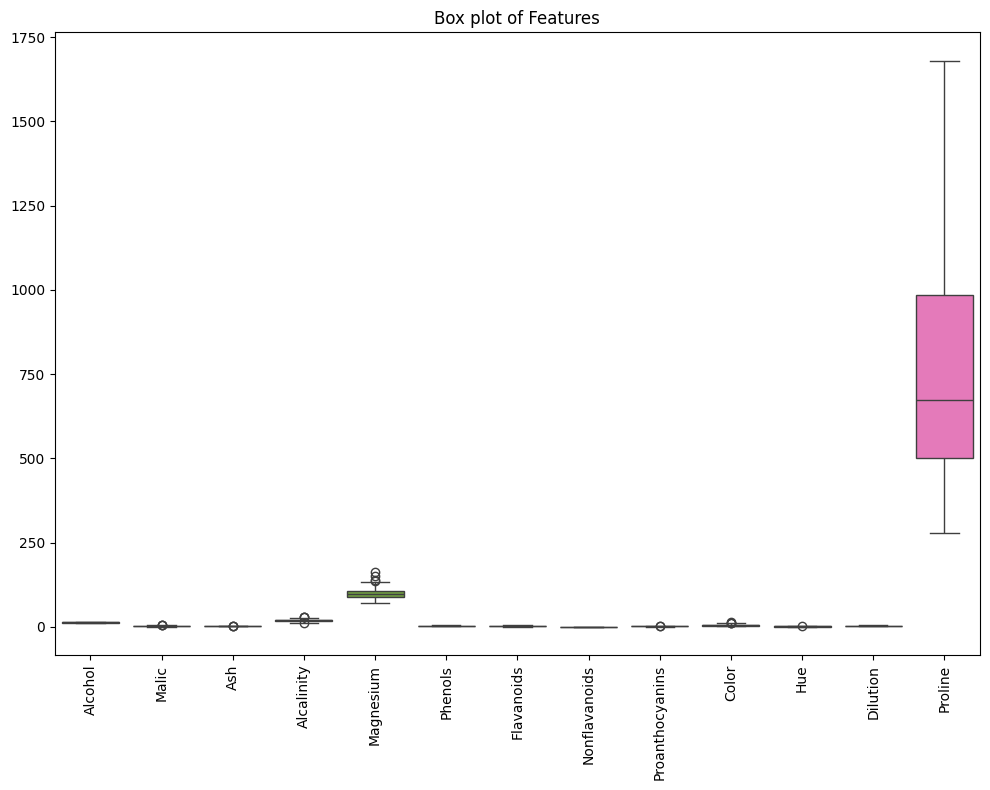

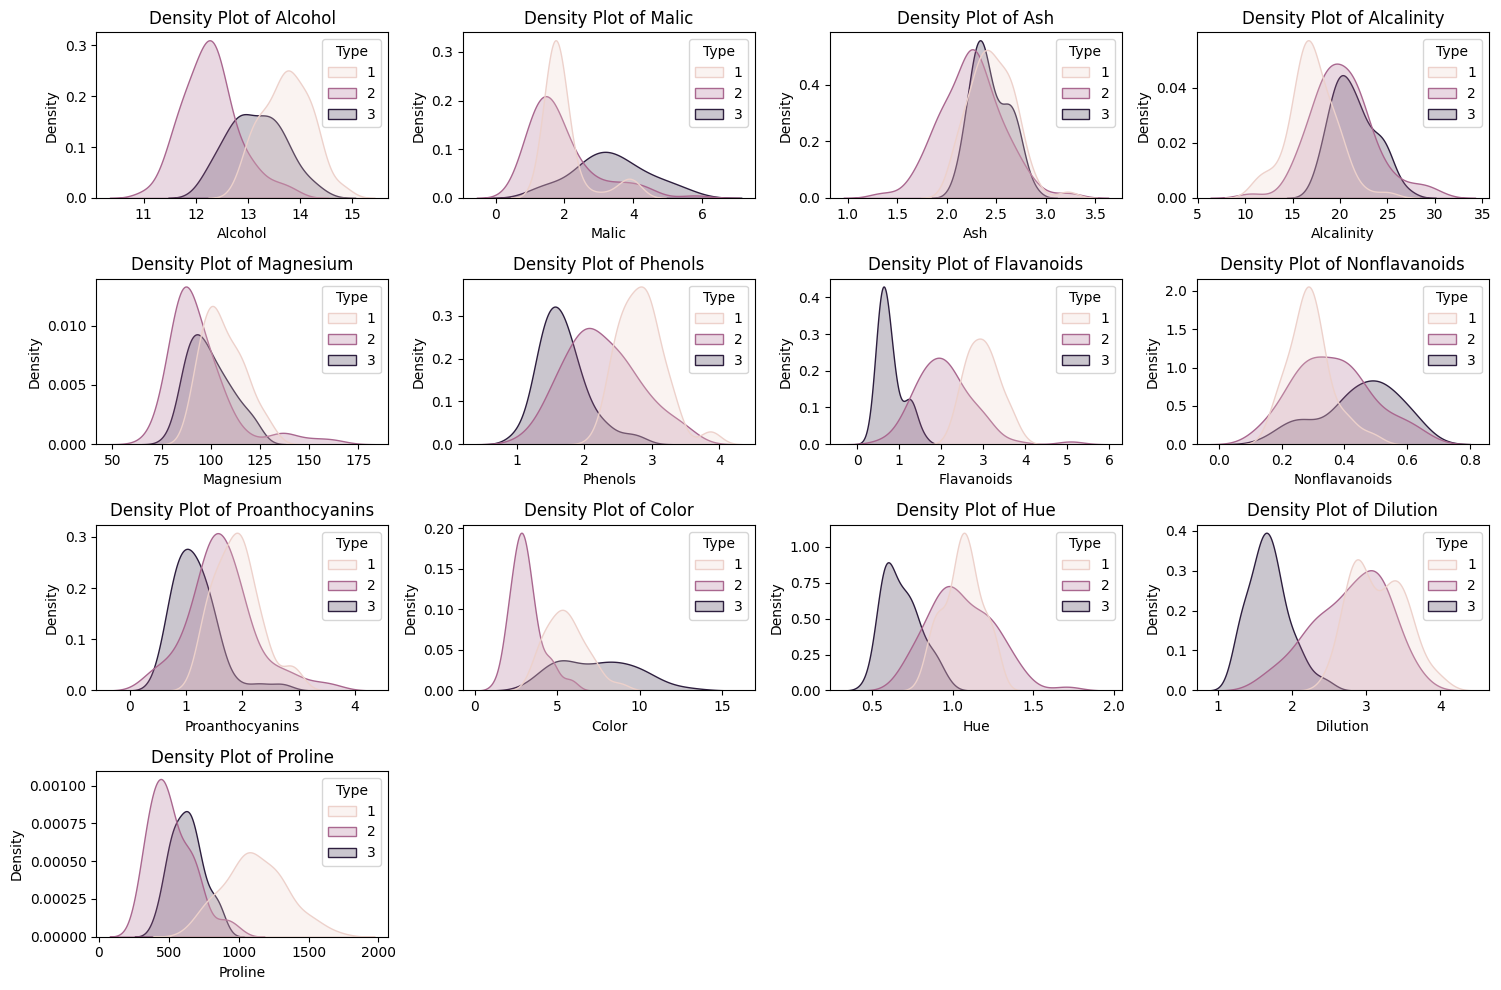

In [ ]:
#Examine the distribution
import matplotlib.pyplot as plt
import seaborn as sns

#Histogram
df.hist(bins=15, figsize=(10,8), edgecolor='black')
plt.suptitle('Feature Distributions - Histograms', fontsize=16)
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

#Box Plots
plt.figure(figsize=(10,8))
sns.boxplot(data=df.drop(columns='Type'))
plt.title('Box plot of Features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Density Plots (KDE)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Type')
plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.kdeplot(data=df, x=col, hue='Type', fill=True)
    plt.title(f'Density Plot of {col}')
plt.tight_layout()
plt.show()

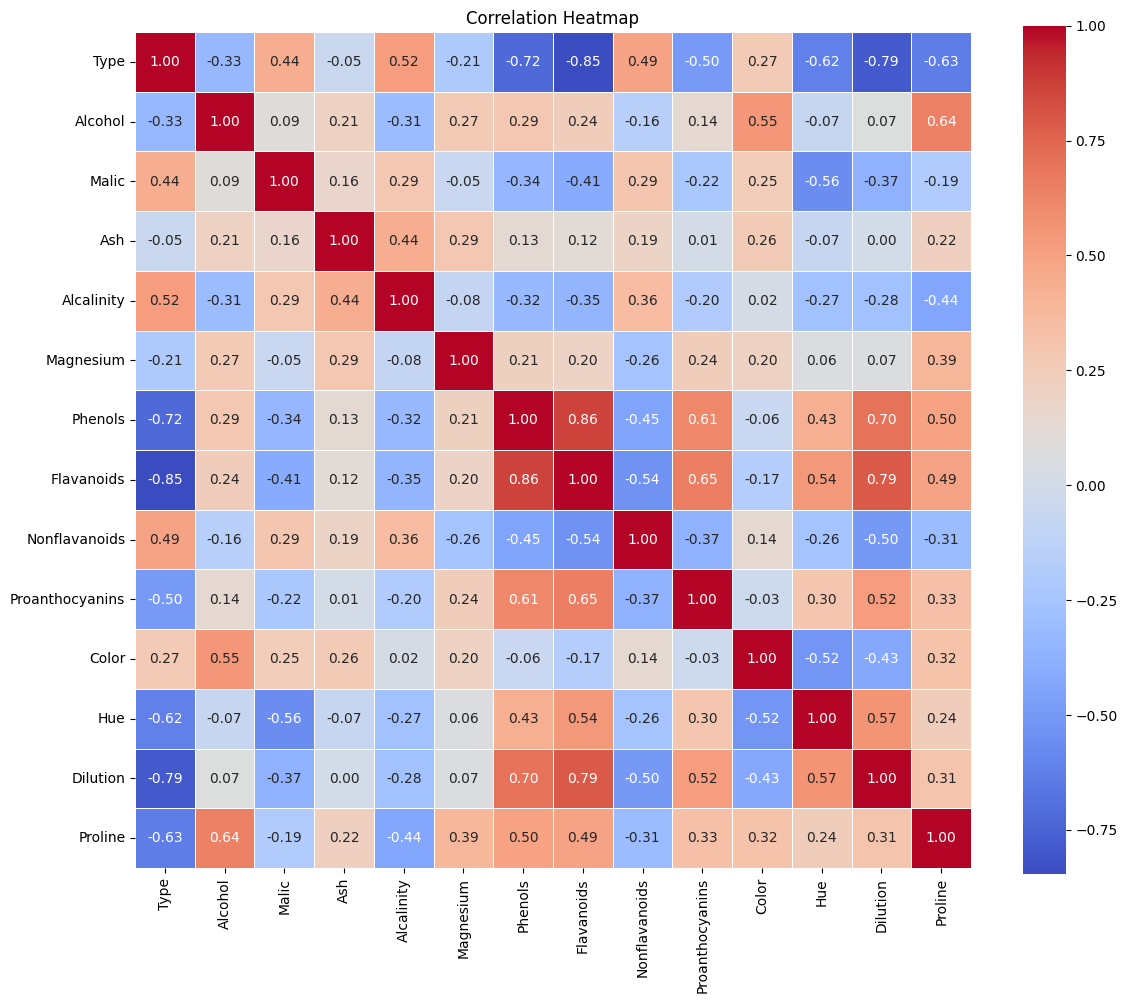

In [ ]:
#Correlation
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

**Task 2: Dimensionality Reduction with PCA**

In [ ]:
#Standardization
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#separate feature and target
X=df.drop(columns='Type') #Fetures
y=df['Type'] #Target

#Standardize the features
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)

#Apply PCA
pca=PCA()
X_pca=pca.fit_transform(X_scaled)

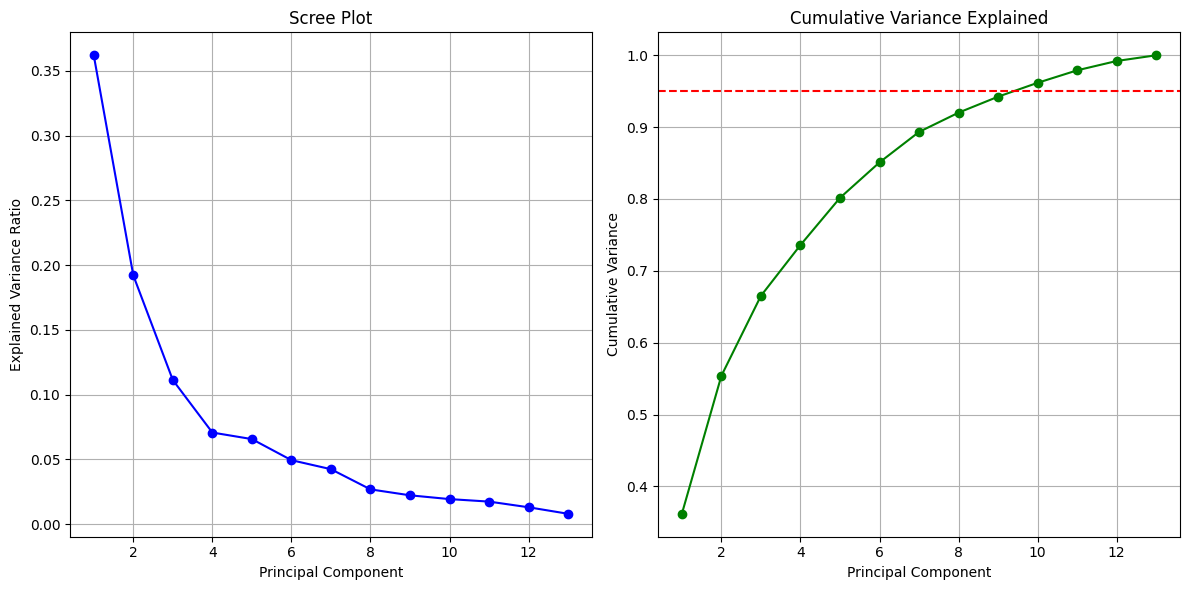


Number of components explaining at least 95% of the variance: 10


In [ ]:
#Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

#Plot Scree and commulative variance plots
plt.figure(figsize=(12,6))

#Scree Plot
plt.subplot(1,2,1)
plt.plot(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, marker='o', linestyle='-', color='b')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)

#Commulative variance plot
plt.subplot(1,2,2)
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='-', color='g')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.title('Cumulative Variance Explained')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance')
plt.grid(True)

plt.tight_layout()
plt.show()


#Print how many components explain at least 95% of the variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nNumber of components explaining at least 95% of the variance: {n_components_95}")

In [ ]:
#Transform original dataset into PCA
pca_df = pd.DataFrame(X_pca[:,:n_components_95], columns=[f'PC{i+1}' for i in range(n_components_95)])
pca_df['Type'] = y
print(f"Transformed dataset with {n_components_95} principal components:")
print(pca_df.head())

Transformed dataset with 10 principal components:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.316751  1.443463 -0.165739 -0.215631  0.693043  0.223880  0.596427   
1  2.209465 -0.333393 -2.026457 -0.291358 -0.257655  0.927120  0.053776   
2  2.516740  1.031151  0.982819  0.724902 -0.251033 -0.549276  0.424205   
3  3.757066  2.756372 -0.176192  0.567983 -0.311842 -0.114431 -0.383337   
4  1.008908  0.869831  2.026688 -0.409766  0.298458  0.406520  0.444074   

        PC8       PC9      PC10  Type  
0 -0.065139 -0.641443  1.020956     1  
1 -1.024416  0.308847  0.159701     1  
2  0.344216  1.177834  0.113361     1  
3 -0.643593 -0.052544  0.239413     1  
4 -0.416700 -0.326819 -0.078366     1  


**Task 3: Clustering with Original Data**

In [ ]:
#Apply K-means clustering with 3 clusters
from sklearn.cluster import KMeans
X=df.drop("Type", axis=1)
kmeans=KMeans(n_clusters=3, random_state=42)
clusters=kmeans.fit_predict(X_scaled)
df['Cluster']=clusters
print(df.head())

   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  Cluster  
0           0.28             2.29   5.64  1.04      3.92     1065        2  
1           0.26             1.28   4.38  1.05      3.40     1050        2  
2           0.30             2.81   5.68  1.03      3.17     1185        2  
3           0.24             2.18   7.80  0.86      3.45     1480        2  
4           0.39             1.82   4.32  1.04      2.93      735        2  


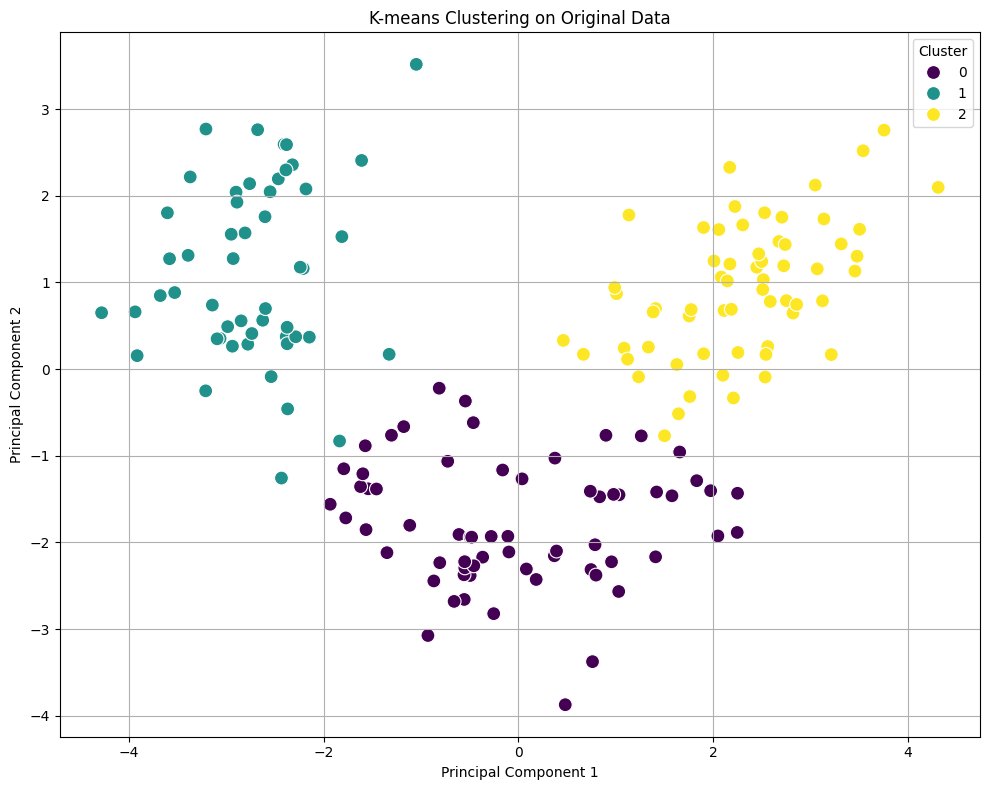

In [ ]:
#Visualization
df['PCA1'] = X_pca[:,0]
df['PCA2'] = X_pca[:,1]
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)
plt.title('K-means Clustering on Original Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Metrics Computation
from sklearn.metrics import silhouette_score, davies_bouldin_score
silhouette = silhouette_score(X_scaled, df['Cluster'])
davies_bouldin = davies_bouldin_score(X_scaled, df['Cluster'])
print(f"Silhouette Score: {silhouette}")
print(f"Davies-Bouldin Score: {davies_bouldin}")

Silhouette Score: 0.2848589191898987
Davies-Bouldin Score: 1.3891879777181648


**Task 4: Clustering with PCA Data**

In [ ]:
#Apply K-means on PCA transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)
pca_df['Cluster_PCA'] = clusters_pca
print(pca_df.head)

<bound method NDFrame.head of           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    3.316751  1.443463 -0.165739 -0.215631  0.693043  0.223880  0.596427   
1    2.209465 -0.333393 -2.026457 -0.291358 -0.257655  0.927120  0.053776   
2    2.516740  1.031151  0.982819  0.724902 -0.251033 -0.549276  0.424205   
3    3.757066  2.756372 -0.176192  0.567983 -0.311842 -0.114431 -0.383337   
4    1.008908  0.869831  2.026688 -0.409766  0.298458  0.406520  0.444074   
..        ...       ...       ...       ...       ...       ...       ...   
173 -3.370524  2.216289 -0.342570  1.058527 -0.574164  1.108788  0.958416   
174 -2.601956  1.757229  0.207581  0.349496  0.255063  0.026465  0.146894   
175 -2.677839  2.760899 -0.940942  0.312035  1.271355 -0.273068  0.679235   
176 -2.387017  2.297347 -0.550696 -0.688285  0.813955 -1.178783  0.633975   
177 -3.208758  2.768920  1.013914  0.596903 -0.895193 -0.296092  0.005741   

          PC8       PC9      PC10  Type  Clus

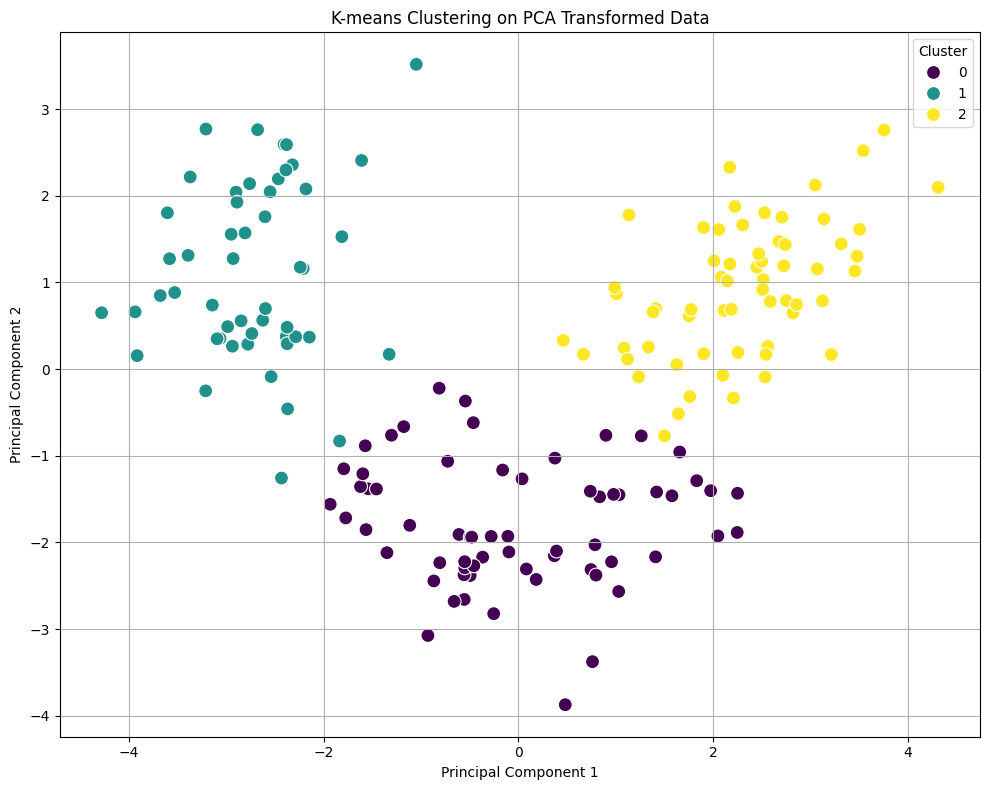

In [ ]:
#Visualization
plt.figure(figsize=(10,8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster_PCA', palette='viridis', s=100)
plt.title('K-means Clustering on PCA Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Compare original dataset and PCA Transformed
from sklearn.metrics import adjusted_rand_score

#compare cluster assignments from original and pca transformed data
comparison = pd.crosstab(df['Cluster'], pca_df['Cluster_PCA'], colnames=['PCA Cluster'])
print("Cluster comparison Table:\n", comparison)

#Compute Adjusted Rand index (1.0 means perfect match, 0.0 means random)
ari_score = adjusted_rand_score(df['Cluster'], pca_df['Cluster_PCA'])
print(f"\nAdjusted Rand Index (ARI): {ari_score}")


Cluster comparison Table:
 PCA Cluster   0   1   2
Cluster                
0            65   0   0
1             0  51   0
2             0   0  62

Adjusted Rand Index (ARI): 1.0


**Task 5: Comparison and Analysis**

In [ ]:
#compare cluster assignments from original and pca transformed data
comparison = pd.crosstab(df['Cluster'], pca_df['Cluster_PCA'], colnames=['PCA Cluster'], rownames=['Original Clustering'])
print("Cluster comparison Table:\n", comparison)

#Compute Adjusted Rand index (1.0 means perfect match, 0.0 means random)
ari_score = adjusted_rand_score(df['Cluster'], pca_df['Cluster_PCA'])
print(f"\nAdjusted Rand Index (ARI): {ari_score}")

Cluster comparison Table:
 PCA Cluster           0   1   2
Original Clustering            
0                    65   0   0
1                     0  51   0
2                     0   0  62

Adjusted Rand Index (ARI): 1.0


Simmilarities in clustering

*   Both methods identifies 3 clear clusters, consistent with the actual wine types.
*   Overall grouping structure is similar.

Differnces in clustering

*   Some sample assignments differ due to information loss in PCA.
*   PCA Based clustering has slightly different boundaries.
*   Cluster labels may not match exactly.

Impact of Dimensionality Reduction


*   Positive impact
1.   Reduce noise and redundancy.
2.  Speed up computation.

*   Potential Drawbacks
1.   Information loss may cause less accurate clustering if important features are compressed.
2.   PCA captures global variance not necessarily features that best separate clusters.





Analysis of Trade-offs

Accuracy

*   Clustering on original data is usually more accurate becoz it uses all original features.
*   Clustering on PCA- transformed data may loss some accuracy due to reduction in dimentionality and information loss.

Computation Time

*   Original data takes more time to process,especially with many features.
*   PCA-transformed data is faster to cluster due to fewer dimensions.

Noise Sensitivity


*   Original data is more affected by noisy or redundant features, which can mislead clustering.
*   PCA reduces noise by retaining only the most significant componenets.







**Task 6: Conclusion and Insights**


*   K-means clustering was successfully applied to both the original wine dataset and the PCA transformed version.
*   PCA reduced the dataset from 13 features to 2 components, making it easier to visualize while retaining most of the variance.
*   Clustering performance was evaluated using Silhouette Score and Davies Bouldin Index.
1.   Original dataset gave slightly better clustering performance due to full feature retention.
2.   PCA-transformed data performed well, but with minor trade-offs in accuracy.
*   Dimensionality reduction with PCA
1.  Improved computational efficiency and visualization.
2.   Reduced noise but also slightly affected clustering precision.
*  Trade-offs observed
1.   Original data offers better accuracy and interpretability.
2.   PCA-transformed data provides better speed and visualizationat the cost of some information loss.










Practical Implications in PCA

*  Noise Reduction : PCA can filter out noise and irrelevant features, improving downstream analysis.
*  Visualization : Reducing data dimension to 2 or 3 principal components allows for easy visualization of complex datasets.
*   Speed and Efficiency : Less data dimension mean faster computation for machine learning models.

Practical Implication in Clustering


*   Unsuprevised Insights : Helps discover natural groupings in data, useful for customer segmentation, pattern discovery.
*   Data Summaization : Clusters represent data subgroups, which can simplify understanding of large datasets.
*  Feature Engineering : Cluster labels can be used as new features in supervised learning.





Recommendations for when to use each technique

*  Use Clustering on original data

1.   Accuracy is critical and you want to preserve all feature information.
2.   The dataset has a manageable number of features.
3. You need clear interpretability of clusters based on actual feature value.

*   Use PCA + Clustering

1.  The dataset is high-dimensional and contains redundant or noisy features.
2.  You need to reduce computation time for clustering.
3.  Visualization is important.



